## Heatmap

Calls seaborn heatmap with some extra tweaks.

Parameters:  

    df: pd.DataFrame, 
    chart_columns: list --> list of strings [] 
    row_index: str --> row column that you want to have
    title='' --> string title
    xlabel='' --> string x label 
    ylabel='' --> string y label 
    cluster_rows=True --> whether or not you want to cluster the rows
    cluster_cols=True --> whether or not you want to cluster the columns
    row_colours=None --> a list of lists [[c1, c2, .... ], []] # need a colour for each value in the datasets
    col_colours=None, 
    vmin=None, --> limit for the hue
    vmax=None,
    linewidths=0.5,
    x_tick_labels=1,
    figsize=(3, 3), 
    title_font_size=8, 
    label_font_size=6, 
    title_font_weight=700, 
    cmap='RdBu_r', 
    annot=False, --> annotation on the top of the heatmap could be a value or a string need one for each
    config={}

    

Config options = any of the parameters with the same name but with in a dictionary format instead, and also includes default parameters for the visualisation such as the font family and font.

Example config:
```
config={'palette': ['red', 'yellow', 'pink'], 
       'figsize':(4, 5),  # Size of figure (x, y)
        'title_font_size': 16, # Size of the title (pt)
        'label_font_size': 12, # Size of the labels (pt)
        'title_font_weight': 700, # 700 = bold, 600 = normal, 400 = thin
        'font_family': 'sans-serif', # 'serif', 'sans-serif', or 'monospace'
        'font': ['Tahoma'] # Default: Arial  # http://jonathansoma.com/lede/data-studio/matplotlib/list-all-fonts-available-in-matplotlib-plus-samples/
}
```

## Loading data

In [1]:
import pandas as pd
from sciviso import Barchart, Boxplot, Heatmap, Histogram, Scatterplot, Violinplot, Volcanoplot, Line
import matplotlib.pyplot as plt

df = pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Basic Heatmap

/Users/ariane/opt/miniconda3/envs/clean_ml/lib/python3.6/site-packages/seaborn/matrix.py:298: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)


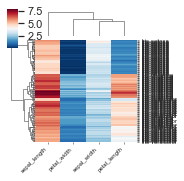

In [2]:
heatmap = Heatmap(df, 
                  chart_columns=['sepal_width', 'sepal_length', 'petal_length', 'petal_width'], 
                  row_index='label')
heatmap.plot(linecolor="") # If you have too many items (like on this plot - you'll have no colour just a black 
# plot so I set the linecolor to be "")
plt.show()


# Add row annotations as colour blocks

Add in the colour of each class as a row label.

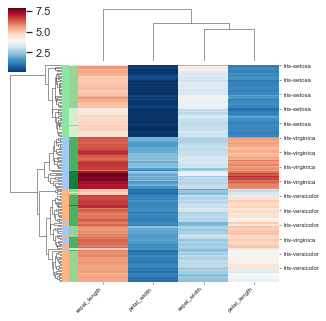

In [3]:
import seaborn as sns
labels = df['label'].values
lut = dict(zip(set(labels), sns.color_palette("pastel", len(set(labels)))))
row_colors = pd.DataFrame(labels)[0].map(lut)

# Create additional row_colors here based on the values of one column as an example
labels = df['sepal_length'].values.astype(int)
lut = dict(zip(set(labels), sns.color_palette("Greens", len(set(labels)))))
row_colors2 = pd.DataFrame(labels)[0].map(lut)
heatmap = Heatmap(df, 
                  chart_columns=['sepal_width', 'sepal_length', 'petal_length', 'petal_width'], 
                  row_index='label', row_colours=[row_colors, row_colors2], 
                  y_tick_labels=10, # How many skips before a tick on the RHS looks neater 
                 figsize=(5, 5))
heatmap.plot(linecolor="")
plt.show()

## Advanced style options

Here are some examples with extra style options.

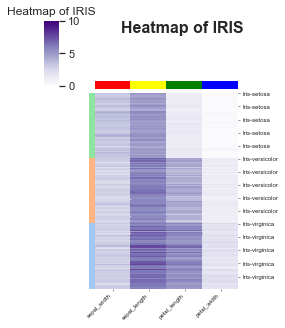

In [4]:
# Remove things like the clustering
labels = df['label'].values
lut = dict(zip(set(labels), sns.color_palette("pastel", len(set(labels)))))
row_colors = pd.DataFrame(labels)[0].map(lut)
heatmap = Heatmap(df, 
                     chart_columns=['sepal_width', 'sepal_length', 'petal_length', 'petal_width'], 
                     row_index='label', 
                     title='Heatmap of IRIS', 
                     xlabel='', ylabel='',
                     cluster_rows=False, 
                     cluster_cols=False, 
                     row_colours=[row_colors], 
                     col_colours=['red', 'yellow', 'green', 'blue'], 
                     vmin=0, 
                     vmax=10, # Setting the top and bottom of the colour scale
                     linewidths=0.5, 
                     x_tick_labels=1,
                     figsize=(3, 3), 
                    title_font_size=8, 
                    label_font_size=6, 
                    title_font_weight=700, 
                    cmap='Purples', 
                    annot=False,
                    y_tick_labels=10, 
                    # Config options = any of the parameters with the same name but with in a dictionary format instead
                     # You could also pass these as individual parameters, but it's easier to set as a dictionary
                    # also, then you can re-use it for other charts!
                      config={'figsize':(4, 5),  # Size of figure (x, y)
                    'title_font_size': 16, # Size of the title (pt)
                    'label_font_size': 12, # Size of the labels (pt)
                    'title_font_weight': 700, # 700 = bold, 600 = normal, 400 = thin
                    'font_family': 'sans-serif', # 'serif', 'sans-serif', or 'monospace'
                    'font': ['Tahoma'] # Default: Arial  # http://jonathansoma.com/lede/data-studio/matplotlib/list-all-fonts-available-in-matplotlib-plus-samples/
                  })
heatmap.plot(linecolor="")
plt.show()

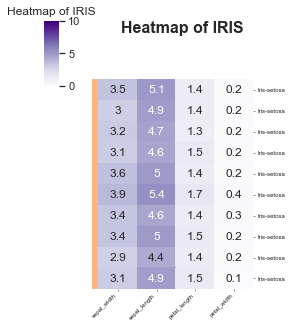

In [5]:
# DO a smaller one with an annotation
versicolor = df[df['label'].values == 'Iris-setosa'][:10]
labels = df['label'].values
lut = dict(zip(set(labels), sns.color_palette("pastel", len(set(labels)))))
row_colors = pd.DataFrame(labels)[0].map(lut)

# Annotate with the values -- this could be anything like a string or something
annot = versicolor[['sepal_width', 'sepal_length', 'petal_length', 'petal_width']].values

heatmap = Heatmap(versicolor, 
                     chart_columns=['sepal_width', 'sepal_length', 'petal_length', 'petal_width'], 
                     row_index='label', 
                     title='Heatmap of IRIS', 
                     xlabel='', ylabel='',
                     cluster_rows=False, 
                     cluster_cols=False, 
                     row_colours=[row_colors], 
                     vmin=0, 
                     vmax=10, # Setting the top and bottom of the colour scale
                     linewidths=0.5, 
                     x_tick_labels=1,
                     figsize=(3, 3), 
                    title_font_size=8, 
                    label_font_size=6, 
                    title_font_weight=700, 
                    cmap='Purples', 
                    annot=annot,
                    y_tick_labels=1, 
                    # Config options = any of the parameters with the same name but with in a dictionary format instead
                     # You could also pass these as individual parameters, but it's easier to set as a dictionary
                    # also, then you can re-use it for other charts!
                      config={'figsize':(4, 5),  # Size of figure (x, y)
                    'title_font_size': 16, # Size of the title (pt)
                    'label_font_size': 12, # Size of the labels (pt)
                    'title_font_weight': 700, # 700 = bold, 600 = normal, 400 = thin
                    'font_family': 'sans-serif', # 'serif', 'sans-serif', or 'monospace'
                    'font': ['Tahoma'] # Default: Arial  # http://jonathansoma.com/lede/data-studio/matplotlib/list-all-fonts-available-in-matplotlib-plus-samples/
                  })
heatmap.plot(linecolor="")
plt.show()

## Saving

Saving is the same for all plots and v simple, just make sure you specify what ending you want it to have.

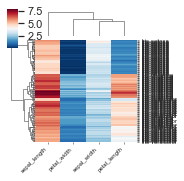

In [6]:
df = pd.read_csv('iris.csv')
heatmap = Heatmap(df, 
                  chart_columns=['sepal_width', 'sepal_length', 'petal_length', 'petal_width'], 
                  row_index='label')
heatmap.plot(linecolor="")
plt.savefig('chart.svg') # .png, .pdf, .jpg
plt.savefig('chart.png', dpi=300) # .png, .pdf, .jpg
plt.savefig('chart.pdf') # .png, .pdf, .jpg